##### Build TUSCAN model

In [4]:
from sklearn.ensemble import RandomForestRegressor
import pybedtools # required for TUSCAN.py

In [5]:
!python3 ModelBuilder.py -r RegressionMatrix.txt RegressionFeatures.txt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Building Random Forest
Fitting Random Forest Regressor
Built!


##### First, run TUSCAN over each viral segment

In this example, we are comparing H1N1 and H5N1 genomes.

In [6]:
!python3 TUSCAN.py -g H1N1_1.fa -o H1N1_1.out -c 1 -m Regression
!python3 TUSCAN.py -g H1N1_2.fa -o H1N1_2.out -c 2 -m Regression
!python3 TUSCAN.py -g H1N1_3.fa -o H1N1_3.out -c 3 -m Regression
!python3 TUSCAN.py -g H1N1_4.fa -o H1N1_4.out -c 4 -m Regression
!python3 TUSCAN.py -g H1N1_5.fa -o H1N1_5.out -c 5 -m Regression
!python3 TUSCAN.py -g H1N1_6.fa -o H1N1_6.out -c 6 -m Regression
!python3 TUSCAN.py -g H1N1_7.fa -o H1N1_7.out -c 7 -m Regression
!python3 TUSCAN.py -g H1N1_8.fa -o H1N1_8.out -c 8 -m Regression
!python3 TUSCAN.py -g H5N1_1.fa -o H5N1_1.out -c 1 -m Regression
!python3 TUSCAN.py -g H5N1_2.fa -o H5N1_2.out -c 2 -m Regression
!python3 TUSCAN.py -g H5N1_3.fa -o H5N1_3.out -c 3 -m Regression
!python3 TUSCAN.py -g H5N1_4.fa -o H5N1_4.out -c 4 -m Regression
!python3 TUSCAN.py -g H5N1_5.fa -o H5N1_5.out -c 5 -m Regression
!python3 TUSCAN.py -g H5N1_6.fa -o H5N1_6.out -c 6 -m Regression
!python3 TUSCAN.py -g H5N1_7.fa -o H5N1_7.out -c 7 -m Regression
!python3 TUSCAN.py -g H5N1_8.fa -o H5N1_8.out -c 8 -m Regression

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Traceback (most recent call last):
  File "TUSCAN.py", line 23, in <module>
    import pybedtools
ModuleNotFoundError: No module named 'pybedtools'
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pic

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Traceback (most recent call last):
  File "TUSCAN.py", line 23, in <module>
    import pybedtools
ModuleNotFoundError: No module named 'pybedtools'
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pic

##### Next we concatenate all potential targets sites from each segment into one file for each virus. 
In this step we also trim whitespace and tabs

In [2]:
!cat H5N1_*.out | tr -s " \t" "\t" > H5N1_merged.txt
!cat H1N1_*.out | tr -s " \t" "\t" > H1N1_merged.txt

##### The penultimate step is to sort the files based on their targets, to facilitate locating unique targets. 

In [3]:
!sort -k 5 H5N1_merged.txt > H5N1_sorted.txt
!sort -k 5 H1N1_merged.txt > H1N1_sorted.txt

##### Finally, we use join on these merged files and extract only the unique (unpaired joins) targets from each virus 

In [4]:
!join -v 1 -1 5 -2 5 H5N1_sorted.txt H1N1_sorted.txt > H5N1_unique.txt
!join -v 2 -1 5 -2 5 H5N1_sorted.txt H1N1_sorted.txt > H1N1_unique.txt

##### Examine Output:

In [5]:
!echo "CRISPR-Cas9 Targets unique to H5N1 Virus\n"
!echo "Segment\tStart\tEnd\tStrand\tSequence\t\tTUSCAN_Score"
!cat H5N1_unique.txt | tr " " "\t" | sort -V #CRISPR-Cas9 targets unique to H5N1 virus 

CRISPR-Cas9 Targets unique to H5N1 Virus

Segment	Start	End	Strand	Sequence		TUSCAN_Score
1	9	31	+	CAGGTCAAATATATTCAATATGG	1.0536045820689341
1	68	90	-	TGTTAGTATCTCGCGAGTGCGGG	0.4356338934975722
1	69	91	-	TTGTTAGTATCTCGCGAGTGCGG	1.3858508773638367
1	81	103	+	GATACTAACAAAAACCACTGTGG	2.721333278363477
1	90	112	+	AAAAACCACTGTGGACCATATGG	2.2958588516566154
1	105	127	-	ATTTCTTGATTATGGCCATATGG	0.719928814223403
1	113	135	-	TGATGTGTATTTCTTGATTATGG	0.15457506636753196
1	115	137	+	ATAATCAAGAAATACACATCAGG	1.0978696697116241
1	152	174	+	ACCCTGCTCTCAGAATGAAATGG	0.6975993496301703
1	153	175	-	TCCATTTCATTCTGAGAGCAGGG	1.0346658899353958
1	154	176	-	ATCCATTTCATTCTGAGAGCAGG	0.2785644304592902
1	159	181	+	TCTCAGAATGAAATGGATGATGG	1.7363914529375626
1	183	205	+	AATGAAATATCCAATCACAGCGG	2.7314850671548583
1	193	215	-	ATTCTCTTGTCCGCTGTGATTGG	0.8327456869306402
1	215	237	+	TAATAGAGATGATTCCTGAAAGG	1.8683076277470714
1	226	248	+	ATTCCTGAAAGGAATGAACAAGG	1.1250604819280732
1	227	249	+	TTCCTGAAAGGAATGAACAAGGG	1.02

In [58]:
!echo "CRISPR-Cas9 Targets unique to H1N1 Virus\n"
!echo "Segment\tStart\tEnd\tStrand\tSequence\t\tTUSCAN_Score"
!cat H1N1_unique.txt | tr " " "\t" | sort -V #CRISPR-Cas9 targets unique to H1N1 virus 

CRISPR-Cas9 Targets unique to H1N1 Virus

Segment	Start	End	Strand	Sequence		TUSCAN_Score
1	41	63	-	AGTGAGTATCTCGCGAGTGCGGG	0.2682077324347328
1	42	64	-	TAGTGAGTATCTCGCGAGTGCGG	2.59440923311088
1	54	76	+	GATACTCACTAAGACCACTGTGG	2.8337522254034293
1	63	85	+	TAAGACCACTGTGGACCATATGG	1.8805865437126894
1	78	100	-	ACTTTTTGATTATGGCCATATGG	0.9899067183745754
1	86	108	-	TGATGTGTACTTTTTGATTATGG	0.08667013999726952
1	88	110	+	ATAATCAAAAAGTACACATCAGG	1.063456085860211
1	92	114	+	TCAAAAAGTACACATCAGGAAGG	1.738928736446694
1	125	147	+	ACCCCGCACTCAGAATGAAATGG	1.4507712649197517
1	126	148	-	TCCATTTCATTCTGAGTGCGGGG	3.5264470710366265
1	127	149	-	ATCCATTTCATTCTGAGTGCGGG	0.24555887197907048
1	128	150	-	CATCCATTTCATTCTGAGTGCGG	1.2991811712687311
1	132	154	+	ACTCAGAATGAAATGGATGATGG	2.0146112491102253
1	165	187	-	TTCTCTTGTCTGCTGTAATTGGG	0.13919690749410563
1	166	188	-	ATTCTCTTGTCTGCTGTAATTGG	0.11343008612524123
1	171	193	+	TACAGCAGACAAGAGAATAATGG	1.748738711080252
1	188	210	+	TAATGGACATGATTCCAGAGAGG	2.96783

##### Extract Segment 8  from each target list

In [3]:
!cat H1N1_unique.txt | grep ^8 > H1N1_8.txt
!cat H5N1_unique.txt | grep ^8 > H5N1_8.txt

##### Create heatmap showing similarity of targets between H1N1 and H5N1 on segment 8

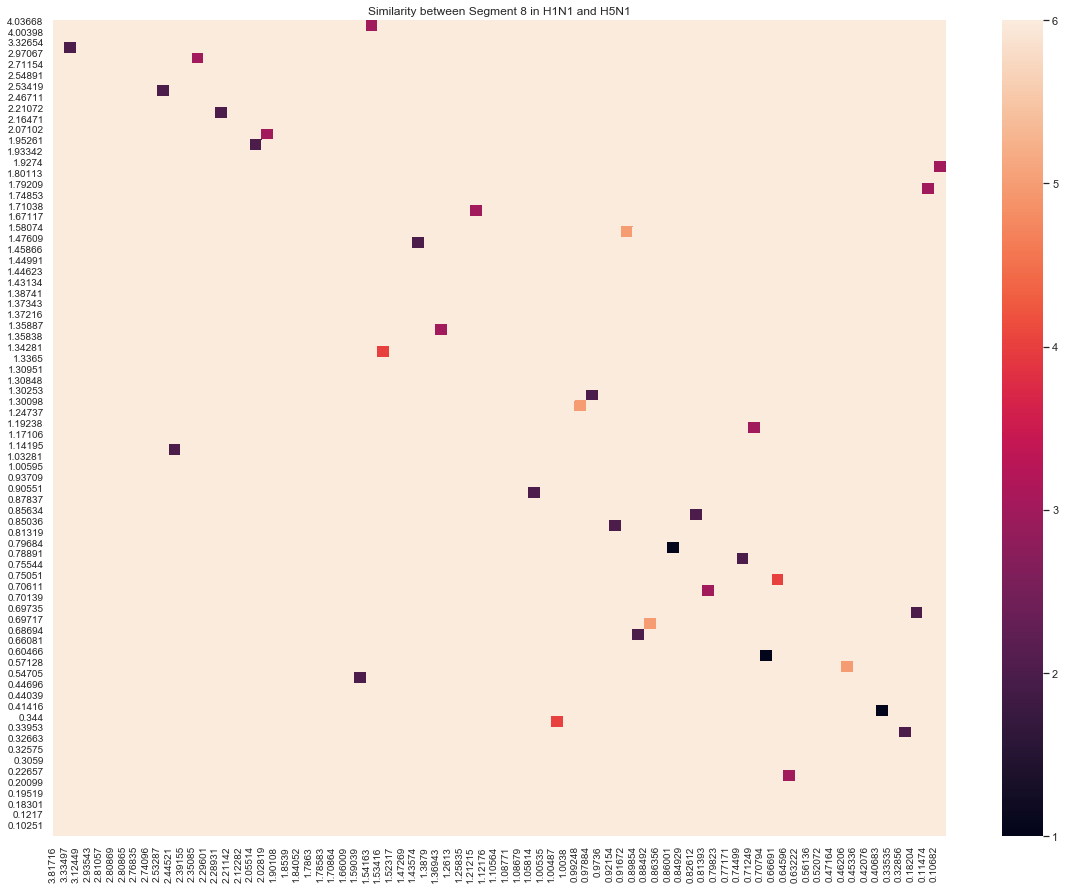

In [17]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

sample_1 = []
sample_2 = []

with open("H1N1_8.txt", "r") as f:
    for line in f:
        words = line.split()
        seq = words[4]
        score = words[5]
        score = round(float(score), 5)
        sample_1.append((words[0], words[1], words[2], words[3], seq, score))

with open("H5N1_8.txt", "r") as f:
    for line in f:
        words = line.split()
        seq = words[4]
        score = words[5]
        score = round(float(score), 5)
        sample_2.append((words[0], words[1], words[2], words[3], seq, score))

sorted_sample1 = sorted(sample_1, key=lambda tup: tup[5], reverse = True)
sorted_sample2 = sorted(sample_2, key=lambda tup: tup[5], reverse = True)

list_of_hammings = []
sample_hamming = []

for sample in sorted_sample2: #H5N1
    sample_hamming = []
    for s in sorted_sample1: #H1N1
        x = sum(ch1 != ch2 for ch1, ch2 in zip(sample[4], s[4]))
        if x > 5:
            x = 6
        sample_hamming.append(x)
    list_of_hammings.append(sample_hamming) 

a = np.array(list_of_hammings)
f, ax = plt.subplots(1, 1, figsize = (20, 15))
ax = sns.heatmap(a)
ax.set_xticks(np.arange(len(sorted_sample1))) #columns are H1N1
ax.set_yticks(np.arange(len(sorted_sample2))) #rows are H5N1
ax.set_xticklabels([i[5] for i in sorted_sample1], rotation=90, fontsize = 'small')
ax.set_yticklabels([i[5] for i in sorted_sample2], rotation=0, fontsize = 'small')
ax.set_title("Similarity between Segment 8 in H1N1 and H5N1")
plt.show()


In [ ]:
#####and pick top 10 highest scoring targets from each virus with at least 5 nucleotides different from all other targets

In [37]:
print("H5N1 Targets")
print('\t'.join(["Segment", "Start", "End", "Strand", "Sequence", " ", "Score"]))

total = 0
for count, b in enumerate(a.min(axis=1)): #best targets for H5N1 (rows)
    if b == 6:
        print('\t'.join(str(c) for c in sorted_sample2[count]))
        total+=1
    if total==10:
        break
print()
print("H1N1 Targets")
print('\t'.join(["Segment", "Start", "End", "Strand", "Sequence", " ", "Score"]))
        
total = 0
for count, b in enumerate(a.min(axis=0)): #best targets for H1N1 (columns)
    if b == 6:
        print('\t'.join(str(c) for c in sorted_sample1[count]))
        total+=1
    if total==10:
        break

H5N1 Targets
Segment	Start	End	Strand	Sequence	 	Score
8	215	237	+	AATAGTGGAGCGGATTCTGGAGG	4.00398
8	230	252	+	TCTGGAGGAGGAGTCCGATAAGG	2.71154
8	323	345	+	GCTCATGCCCAAGCAGAAAGTGG	2.54891
8	461	483	+	CACAGAAGAAGGAGCAATCGTGG	2.46711
8	614	636	+	CGTTTGGAGAAGCAGTGATGAGG	2.16471
8	200	222	+	TCGCGCAGGAAAGCAAATAGTGG	1.93342
8	654	676	-	ATTTTCCGTTTTTGATTTGGAGG	1.80113
8	290	312	+	GACTCTCGAAGAAATGTCAAGGG	1.74853
8	789	811	+	CTTACAACTACTGCTTGAAGTGG	1.67117
8	362	384	+	CAAAATGGACCAGGCAATAATGG	1.45866

H1N1 Targets
Segment	Start	End	Strand	Sequence	 	Score
8	673	695	+	GCAATTGGGACAGAAATTTGAGG	3.81716
8	108	130	-	TTAAGGACTTTTGATCTCGGCGG	3.12449
8	435	457	+	ACTACTAAGGGCTTTCACTGAGG	2.93543
8	345	367	+	TTGCGTGCGATTGGACCAGGCGG	2.81057
8	267	289	+	CCTTTCTGACATGACCCTCGAGG	2.80869
8	192	214	+	CGTGGAATGGATCTTGAAAGAGG	2.80865
8	340	362	-	TGGTCCAATCGCACGCAAAGAGG	2.76835
8	174	196	+	TCTTGTTGGGAAACAAATCGTGG	2.74096
8	282	304	-	AGTCTCGTGACATTTCCTCGAGG	2.39155
8	339	361	-	GGTCCAATCGCACGCAAAGAGGG	2.29601
